# Extrasolar Kepler's 3rd Law for Confirmed Planets

So as to be transparent, I base the following analysis from my lecture notes and examples from the following Udemy courses: 

***Machine Learning in Python Level 1: Beginner*** by Hadelin de Ponteves and Kirill Eremenko

***Machine Learning Classification Bootcamp in Python*** by Dr. Ryan Ahmed, Ph.D., MBA (in progress)

***Python for Data Science and Machine Learning Bootcamp*** by Jose Portilla

as well as chunks of code gleaned from similar studies on Kaggle. Note this data set was aquired outside of these courses. The code here also has been modified from the original sources as it applies to this specific work, as well as to differentiate it from the course content.

The first goal of this analysis will be to recreate the following figure from **The Essential Cosmic Perspective, 7th Edition** Figure 10.13 - and to include all/any new public data available beyond what was used in this publication.

I am co-teaching an advanced undergraduate astronomy course that includes techniques in astronomy data analysis. I wanted to show the basics of linear regression to students, many of whom have no coding background. I had been playing around with an exoplanet dataset that had availabile all of the ingredients to show Kepler's 3rd Law.

The unfortunate truth of the matter is that it is very likely that Kepler's 3rd Law was used explicitely to calculate the semi-major axis (described below) in this data set, so doing a linear regression is not actually a wise thing to do because (at least) one of the variables is not independent of the others. There however may be expected noise due to how the dataset is compiled, basically a meta-analysis of hundred (or more) studies that might have calculated these quantities with similar (but slightly different) approaches.

For instructional purposes this is a useful dataset so as to not need to create artificial data.

# Kepler's 3rd Law

$P^2 = \frac{4 \pi^2}{G(M_{star}+M_{planet})} a^3 \approx \frac{4 \pi^2}{G M_{star}} a^3$ 

Where $P$ is the period, $G$ is the gravitational constant, $a$ is the semi-major axis, $M_{star}$ is the star's mass, and $M_{planet}$ is the mass of the planet. The approximation is true when $M_{star} >> M_{planet}$.

When using $P$ in years, $a$ in AU, and $M_{star}$ in $M_{\odot}$ (solar masses), then:

$P^2 \approx \frac{1}{M_{star}} a^3$


$P \approx \frac{1}{M_{star}^{1/2}} a^{3/2}$



Taking the $\log_{10}$ of both sides:

$\log_{10} P = \frac{3}{2} \log_{10} M_{star} - \frac{1}{2} \log_{10} M_{star}$.

So if we treat $\log_{10} P$ as the dependent variable, then we should find coefficients of $\frac{3}{2}$ and $\frac{-1}{2}$.

## Crashcourse - Exoplanets:

It comes as a surprise to many that we actually do not directly image planets orbiting other stars all the often. In fact we only have ~60-70 confirmed images of exoplanets (stated on the website this data is sourced from). We detect planets around other stars primary through indirect methods. 

The ***transit method*** looks for eclipses of the planet passinging in front of the parent star. It is important to note here that we still are not directly imaging the planet NOR are we seeing this eclipse in the way we see solar/lunar/Venus/etc. eclipses on Earth. We simply measure the drop in brightness of the parent star. Through physics, we can turn that drop into the **radius of the planet** $R_{\rm planet}$ when we also know information about the star (which is another discussion, but for this study assume that is usually the case for these systems). The frequency with which these transits occur tell us the **period** $P$, and through a relationship called Kepler's 3rd Law, (${\rm Period})^2 \propto ({\rm Semi-Major \  Axis})^3$, we can determine the **semi-major axis** $a$. The semi-major axis is, for nearly circular systems, approximately the average distance between the planet and the star (elliptical systems this relates to the longest half-axis, not important for this analysis).

***Radial velocity*** (or ***RV***) method uses the doppler method (through spectral features (like emission/absortion lines) in the parent star's spectra) to discover planets due to the gravitational *wobble* of a planetary system around the parent star. This method also returns the **period** (and thus semi-major axis) when observed more than once, but this wobble gives the **mass of the planet** $M_{\rm planet}$ - well kind of. This method can not on it's own identify the inclination (parameterized by angle $i$), and thus this method only gives $M_{\rm planet} \sin i$ when $i$ can not be determined.

## The dataset

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars

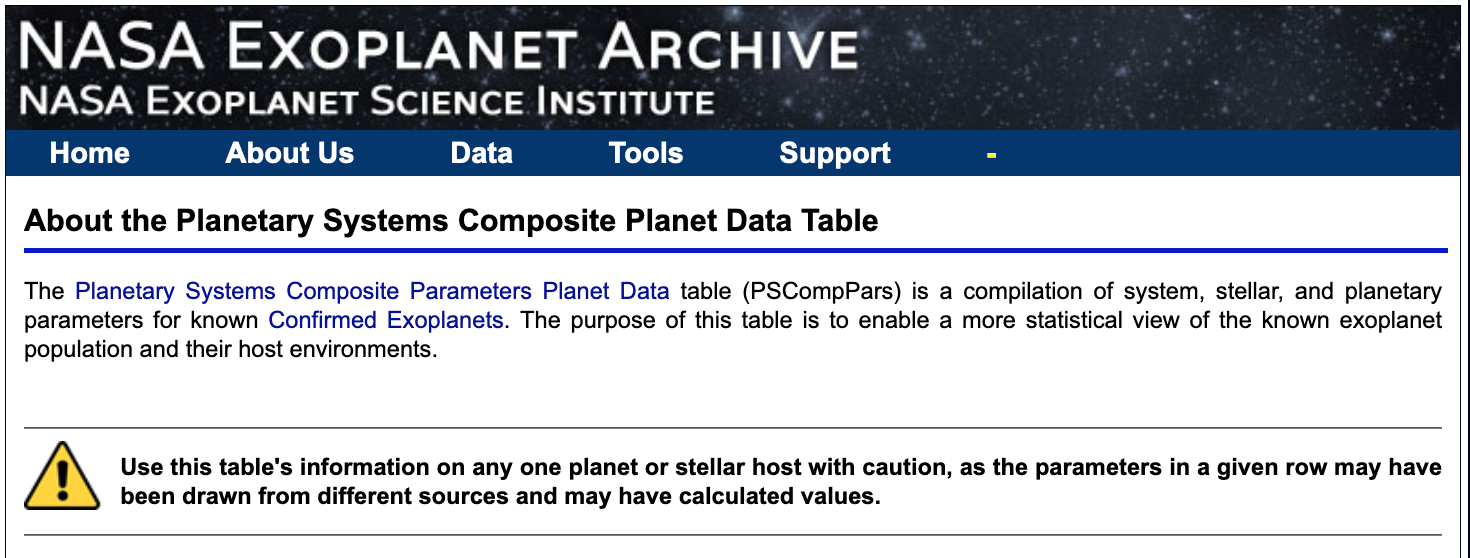

## Importing the dataset 
#### Based On *Machine Learning in Python Level 1: Beginner*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
#### Header from the original csv.

#### This file was produced by the NASA Exoplanet Archive  http://exoplanetarchive.ipac.caltech.edu
#### Sun Feb 26 13:35:18 2023
####
#### User preference: *
####
#### COLUMN pl_name:        Planet Name
#### COLUMN hostname:       Host Name
#### COLUMN sy_snum:        Number of Stars
#### COLUMN sy_pnum:        Number of Planets
#### COLUMN discoverymethod: Discovery Method
#### COLUMN disc_year:      Discovery Year
#### COLUMN disc_facility:  Discovery Facility
#### COLUMN rv_flag:        Detected by Radial Velocity Variations
#### COLUMN tran_flag:      Detected by Transits
#### COLUMN pl_controv_flag: Controversial Flag
#### COLUMN pl_orbper:      Orbital Period [days]
#### COLUMN pl_orbsmax:     Orbit Semi-Major Axis [au])
#### COLUMN pl_rade:        Planet Radius [Earth Radius]
#### COLUMN pl_radj:        Planet Radius [Jupiter Radius]
#### COLUMN pl_bmasse:      Planet Mass or Mass*sin(i) [Earth Mass]
#### COLUMN pl_bmassj:      Planet Mass or Mass*sin(i) [Jupiter Mass]
#### COLUMN pl_bmassprov:   Planet Mass or Mass*sin(i) Provenance
#### COLUMN pl_orbeccen:    Eccentricity
#### COLUMN pl_insol:       Insolation Flux [Earth Flux]
#### COLUMN pl_eqt:         Equilibrium Temperature [K]
#### COLUMN ttv_flag:       Data show Transit Timing Variations
#### COLUMN st_spectype:    Spectral Type
#### COLUMN st_teff:        Stellar Effective Temperature [K]
#### COLUMN st_rad:         Stellar Radius [Solar Radius]
#### COLUMN st_mass:        Stellar Mass [Solar mass]
#### COLUMN st_met:         Stellar Metallicity [dex]
#### COLUMN st_metratio:    Stellar Metallicity Ratio
#### COLUMN st_logg:        Stellar Surface Gravity [log10(cm/s**2)]
#### COLUMN rastr:          RA [sexagesimal]
#### COLUMN ra:             RA [deg]
#### COLUMN decstr:         Dec [sexagesimal]
#### COLUMN dec:            Dec [deg]
#### COLUMN sy_dist:        Distance [pc]

In [3]:
df_big = pd.read_csv('PSCompPars_2023.02.26_13.35.18.csv')#, sep=',', on_bad_lines='skip')

As the original figure used $\log_{10} M_{\rm planet}$ and $\log_{10} R_{\rm planet}$, add these to the dataset. Also added density while I was at it. Also added $\log_{10}$ of other things (for analysis later).

In [4]:
df_big['log_pl_bmasse'] = np.log10(df_big['pl_bmasse'].iloc[:].values)
df_big['log_pl_rade'] = np.log10(df_big['pl_rade'].iloc[:].values)
densitye = df_big['pl_bmasse'].iloc[:].values / ((4/3)*(df_big['pl_rade'].iloc[:].values)**3.)
df_big['pl_densitye'] = densitye
df_big['log_pl_densitye'] = np.log10(df_big['pl_densitye'].iloc[:].values)
df_big['log_pl_orbper']= np.log10(df_big['pl_orbper'].iloc[:].values)
df_big['log_pl_orbsmax']= np.log10(df_big['pl_orbsmax'].iloc[:].values)
df_big['log_st_mass']= np.log10(df_big['st_mass'].iloc[:].values)

In [5]:
df_big['pl_class'] = df_big['pl_name']

pl_densitye = df_big['pl_densitye'].iloc[:].values
pl_class = df_big['pl_name'].iloc[:].values #dummy variables

den = 17.32

pl_class[(pl_densitye*den <= 2.85)] = 'Jovian'
pl_class[(pl_densitye*den > 2.85) & (pl_densitye*den <= 19.2)] = 'Terrestrial'
pl_class[(pl_densitye*den > 19.2)] = 'BrownDwarf'
df_big['pl_class'] = pl_class

In [6]:
for col in df_big.columns:
    print(col)

pl_name
hostname
sy_snum
sy_pnum
discoverymethod
disc_year
disc_facility
rv_flag
tran_flag
pl_controv_flag
pl_orbper
pl_orbsmax
pl_rade
pl_radj
pl_bmasse
pl_bmassj
pl_bmassprov
pl_orbeccen
pl_insol
pl_eqt
ttv_flag
st_spectype
st_teff
st_rad
st_mass
st_met
st_metratio
st_logg
rastr
ra
decstr
dec
sy_dist
log_pl_bmasse
log_pl_rade
pl_densitye
log_pl_densitye
log_pl_orbper
log_pl_orbsmax
log_st_mass
pl_class


In [7]:
# Grab systems where both transit and RV methods are detected.
#Get Rid of Brown Dwarfs
#also get rid of missing data
#df_detect = df_big[(df_big['rv_flag'] == 1) & (df_big['tran_flag'] == 1)]
df_detect = df_big[(df_big['rv_flag'] == 1) & (df_big['tran_flag'] == 1) & (df_big['pl_densitye'] <= 19.2/den)]

df_detect = df_detect.dropna(subset=['log_pl_bmasse','log_pl_rade','log_pl_densitye','log_pl_orbper','log_pl_orbsmax','st_teff', 'st_mass','pl_class'])

In [8]:
df = df_detect[['log_pl_orbper','log_pl_orbsmax','log_st_mass','pl_class']]
##df_export = df_detect[['pl_name','pl_orbper','pl_orbsmax','st_mass']]

In [9]:
#Create CSV for use in class...
##df_export.to_csv('PHYS410.csv', index=False)

### Explore Data - My Work 

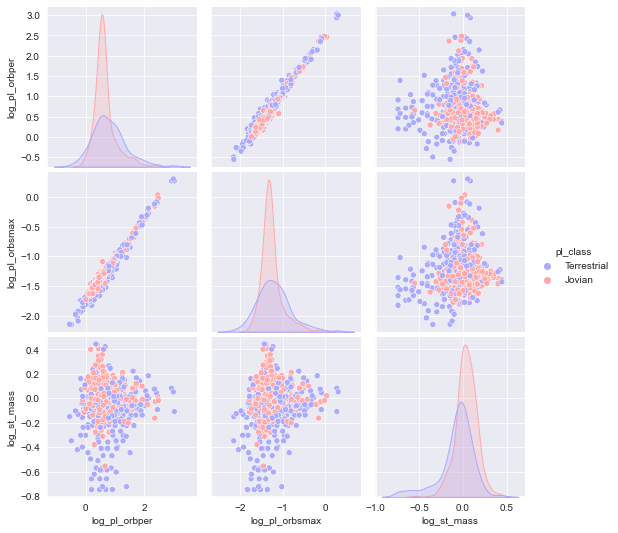

In [10]:
sns.pairplot(df,palette='bwr',hue='pl_class')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 795 entries, 30 to 5256
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   log_pl_orbper   795 non-null    float64
 1   log_pl_orbsmax  795 non-null    float64
 2   log_st_mass     795 non-null    float64
 3   pl_class        795 non-null    object 
dtypes: float64(3), object(1)
memory usage: 31.1+ KB


# Linear Regression

Methods from:

***Machine Learning in Python Level 1: Beginner*** by Hadelin de Ponteves and Kirill Eremenko

***Python for Data Science and Machine Learning Bootcamp*** by Jose Portilla

In [12]:
X = df.iloc[:,1:3].values #let's predict the period as a function of a and Mstar

In [13]:
X.shape

(795, 2)

In [14]:
y = df.iloc[:,0].values 

In [15]:
y.shape

(795,)

## Creating the Training Set and the Test Set
#### Based On *Machine Learning in Python Level 1: Beginner*

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Building and training the model
#### Based On *Machine Learning in Python Level 1: Beginner*

In [18]:
from sklearn.linear_model import LinearRegression #LinearRegression is a class
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression()

In [20]:
m = np.array([3/2,-1/2])
m_pred = model.coef_
print('model coeff: ',m_pred)

model coeff:  [ 1.47677807 -0.43194619]


In [21]:
b = model.intercept_
print('y-intercept: ', b)

y-intercept:  2.5358977450276603


In [22]:
print('percent error',(m - m_pred) / m *100 )

percent error [ 1.54812888 13.61076189]


In [23]:
y_pred = model.predict(X_test)

In [24]:
df['log_pl_orbper_pred']=model.predict(X)

/var/folders/ny/3twd2wjn4_lcsddswcby5gdc0000gn/T/ipykernel_17009/1093292864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_pl_orbper_pred']=model.predict(X)


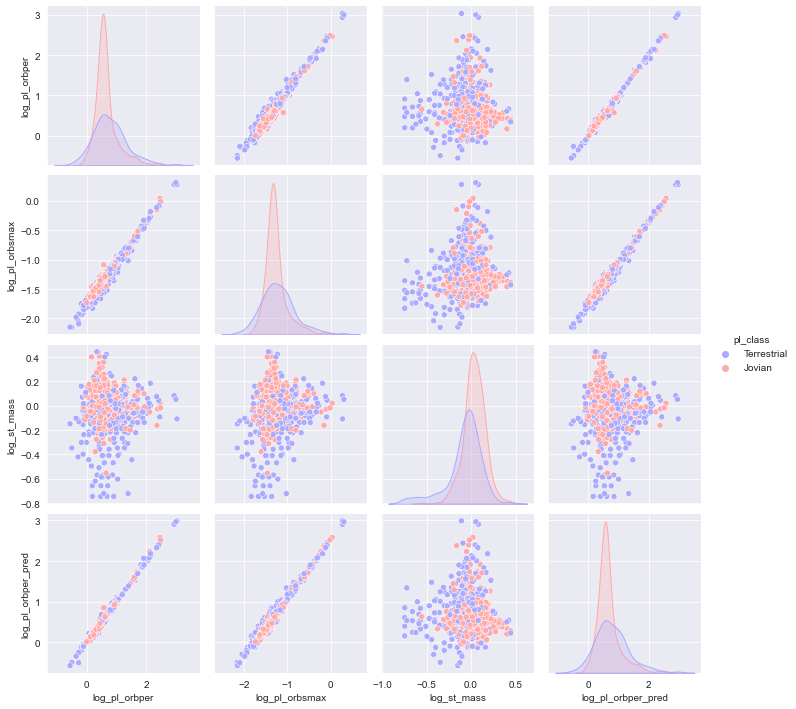

In [25]:
sns.set_style('darkgrid')
sns.pairplot(df,palette='bwr', hue='pl_class')

## Evaluating the model
#### Based On *Machine Learning in Python Level 1: Beginner*

In [26]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

In [27]:
print("R^2 = ",r2)

R^2 =  0.9942856291606873


In [28]:
k = X_test.shape[1]
n = X_test.shape[0]
adj_r2 = 1 -(1-r2)*(n-1)/(n-k-1)

In [29]:
print("Adjusted R^2 = ",adj_r2)

Adjusted R^2 =  0.9942123679960807
